# Chapter 4_ 1Modern Deep Learning:
# Classify Fashion-MNIST with a simple CNN in Keras

<br>  4/24/2018

![alt text](https://github.com/margaretmz/deep-learning/blob/master/images/modern%20dl_fash-mnist_keras.png?raw=1)

## Why Fashion-MNIST?


*   MNIST is too easy
*   MNIST is overused
*   MNIST can not represent modern Computer Vision tasks

Read more about the Fashion-MINST dataset in this paper [here](https://arxiv.org/abs/1708.07747) (**Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms**)



## Notebook Overview

This is a tutorial of how to classify **fashion_mnist** data with a simple **Convolutional Neural Network** in Keras.
Keras is now part of the core TensorFlow library, in addition to being an independent open source project.

The [fashion_mnist](https://github.com/zalandoresearch/fashion-mnist) data:
60,000 train and 10,000 test data with 10 categories. Each gray-scale image is 28x28.

<br> **Label**	**Description**
<br> 0 T-shirt/top
<br> 1 Trouser
<br> 2 Pullover
<br> 3 Dress
<br> 4 Coat
<br> 5 Sandal
<br> 6 Shirt
<br> 7 Sneaker
<br> 8 Bag
<br> 9 Ankle boot

Each gray-scale image is 28x28

## Download the fashion_mnist data
First let's install TensorFlow version 1.8.0 and import Tensorflow. Then we download fashion-mnist which is one of the Keras datasets.

In [11]:
!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


## Visualize the data

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 3 Dress


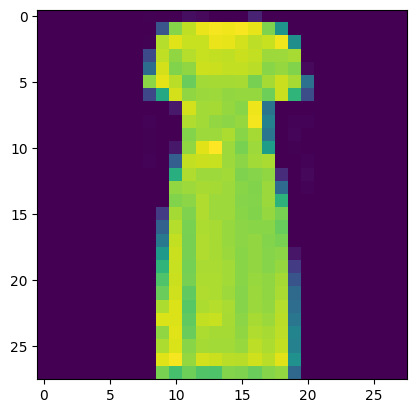

In [12]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2
                        "Dress",        # index 3
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6
                        "Sneaker",      # index 7
                        "Bag",          # index 8
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 50
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

## Data normalization
Normalize the data dimensions so that they are of approximately the same scale.

แปลง Data type ของข้อมูลให้เป็น Float เพื่อให้ Algorithm สามารถคำนวนและแสดงผลเป็นค่าทศนิยมได้


In [13]:
x_train = x_train.astype('float32') / 255  #Scale ข้อมูลโดยใช้วิธี Normalise ซึ่งก็คือการหารข้อมูลทุกรายการด้วย Range ของค่าความสว่างของแต่ละ Pixel นั่นก็คือ 255
x_test = x_test.astype('float32') / 255

In [14]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


## Split the data into train/validation/test data sets


*   Training data - used for training the model
*   Validation data - used for tuning the hyperparameters and evaluate the models
*   Test data - used to test the model after the model has gone through initial vetting by the validation set.



In [15]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1) #เปลี่ยนมิติข้อมูลให้เป็น 4 มิติ คือ (จำนวนรายการ, Column, Row, จำนวน Layer สี) โดยข้อมูลของเราเป็นภาพขาวดำขนาด 28 x 28 ดังนั้นมิติคือ (จำนวนรายการ, 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [16]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [8]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Create the model architecture

There are two APIs for defining a model in Keras:
1. [Sequential model API](https://keras.io/models/sequential/)
2. [Functional API](https://keras.io/models/model/)

In this notebook we are using the Sequential model API.
If you are interested in a tutorial using the Functional API, checkout Sara Robinson's blog [Predicting the price of wine with the Keras Functional API and TensorFlow](https://medium.com/tensorflow/predicting-the-price-of-wine-with-the-keras-functional-api-and-tensorflow-a95d1c2c1b03).

In defining the model we will be using some of these Keras APIs:
*   Conv2D() [link text](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D/) - create a convolutional layer
*   Pooling() [link text](https://keras.io/layers/pooling/) - create a pooling layer
*   Dropout() [link text](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) - apply drop out

In [17]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
import tensorflow as tf


model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) #same เป็นการกำหนดให้ output มีขนาดเท่ากับ input ไม่ padding แต่ถ้าต้องการ padding ให้ใช้ 'valid'
model.add(tf.keras.layers.MaxPooling2D(pool_size=2)) #maxpooling = 2*2
model.add(tf.keras.layers.Dropout(0.3)) # ลดจำนวน Node 30% เพื่อลด overfitting

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax')) #ใช้ Softmax activation function ซึ่งทำให้โมเดลสามารถ Output แบบ Multiclass ได้ โดยเราต้องกำหนดจำนวน Neuron เท่ากับจำนวน Class ที่เป็นไปได้ ซึ่งก็คือ 10 นั่นเอง

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

## Compile the model
Configure the learning process with compile() API before training the model. It receives three arguments:

*   An optimizer
*   A loss function
*   A list of metrics


In [19]:
model.compile(loss='categorical_crossentropy',        # ใช้ประเภทในการจัดการ compile
             optimizer='adam',
             metrics=['accuracy'])

## Train the model

Now let's train the model with fit() API.

We use  the [ModelCheckpoint](https://keras.io/callbacks/#modelcheckpoint) API to save the model after every epoch. Set "save_best_only = True" to save only when the validation accuracy improves.

ModelCheckpoint คือ การให้โมเดลเซฟตัวเองทุกครั้งเมื่อ val_loss มีการพัฒนาขึ้น

- epochs จำนวนรอบของการเทรน โดยแต่ละ Epoch จะทำให้ Loss ลดลง ในขณะที่ Accuracy เพิ่ม
- batch_size ขนาดของ Batch ซึ่งก็คือจำนวนรายการข้อมูลที่จะให้ Optimiser คำนวนในหนึ่งครั้ง เช่น ข้อมูลมี 2,000 รายการ ถ้ากำหนด Batch size เป็น 32 แปลว่า Optimiser จะต้องทำงาน 62.5 ครั้ง จึงจะครบทั้ง 2,000 รายการ และถ้ากำหนด Epoch เป็น 20 ก็หมายถึงการทำงาน 62.5 ครั้ง 20 รอบ การกำหนด Batch size จะมีผลโดยตรงกับความเร็วในการคำนวน ยิ่ง Batch ใหญ่ ยิ่งคำนวนเร็ว แต่ Batch ที่ใหญ่เกินไปอาจทำให้ข้อมูลที่คำนวนมีขนาดใหญ่เกินกว่า Memory ของเครื่องเราจะรองรับได้ ทั้งนี้ใน การกำหนด Batch size แบบต่างๆ จะมีชื่อเรียกเฉพาะ เช่น Batch gradient descent แปลว่า Batch size เท่ากับจำนวนรายการข้อมูล ไม่มีการแบ่ง, Mini-batch gradient descent คือการแบ่งข้อมูลออกเป็น Batch, ส่วน Stochastic gradient descent คือ Batch size เท่ากับ 1
- validation split เราสามารถกัน Train set ส่วนหนึ่งไว้เป็น Validation set ซึ่งก็คือข้อมูลชุดที่โมเดลไม่เคยเห็น Keras จะคำนวน Loss และความแม่นยำกับ Validation set ทุกครั้งที่คำนวนจบ 1 Epoch และแสดงผลให้เราเห็น อนึ่งการแบ่ง Validation set จะตัดเอาส่วนสุดท้ายของ Train set มาเลยโดยไม่สุ่ม ดังนั้นเราจึงควรสุ่ม Shuffle ข้อมูลให้เรียบร้อยตั้งแต่แรก รายละเอียดเกี่ยวกับการแบ่งชุดข้อมูลออกเป็น Train / Validation / Test set


In [21]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
history = model.fit(x_train,
         y_train,
         batch_size=32,
         epochs=2,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/2
1719/1719 [==============================] - ETA: 0s - loss: 0.2696 - accuracy: 0.8999
Epoch 1: val_loss improved from inf to 0.24147, saving model to model.weights.best.hdf5
1719/1719 [==============================] - 77s 45ms/step - loss: 0.2696 - accuracy: 0.8999 - val_loss: 0.2415 - val_accuracy: 0.9092
Epoch 2/2
1719/1719 [==============================] - ETA: 0s - loss: 0.2641 - accuracy: 0.9016
Epoch 2: val_loss improved from 0.24147 to 0.23153, saving model to model.weights.best.hdf5
1719/1719 [==============================] - 79s 46ms/step - loss: 0.2641 - accuracy: 0.9016 - val_loss: 0.2315 - val_accuracy: 0.9134


## Load Model with the best validation accuracy

In [22]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

## Test Accuracy

In [23]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9096999764442444


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


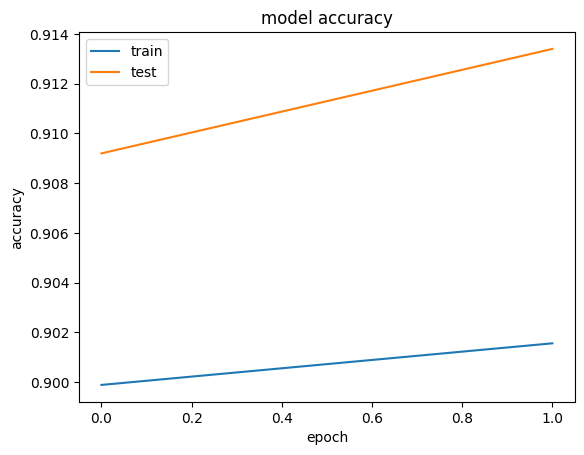

In [24]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

## Visualize prediction
Now let's visualize the prediction using the model you just trained.
First we get the predictions with the model from the test data.
Then we print out 15 images from the test data set, and set the titles with the prediction (and the groud truth label).
If the prediction matches the true label, the title will be green; otherwise it's displayed in red.

313/313 [==============================] - 4s 13ms/step


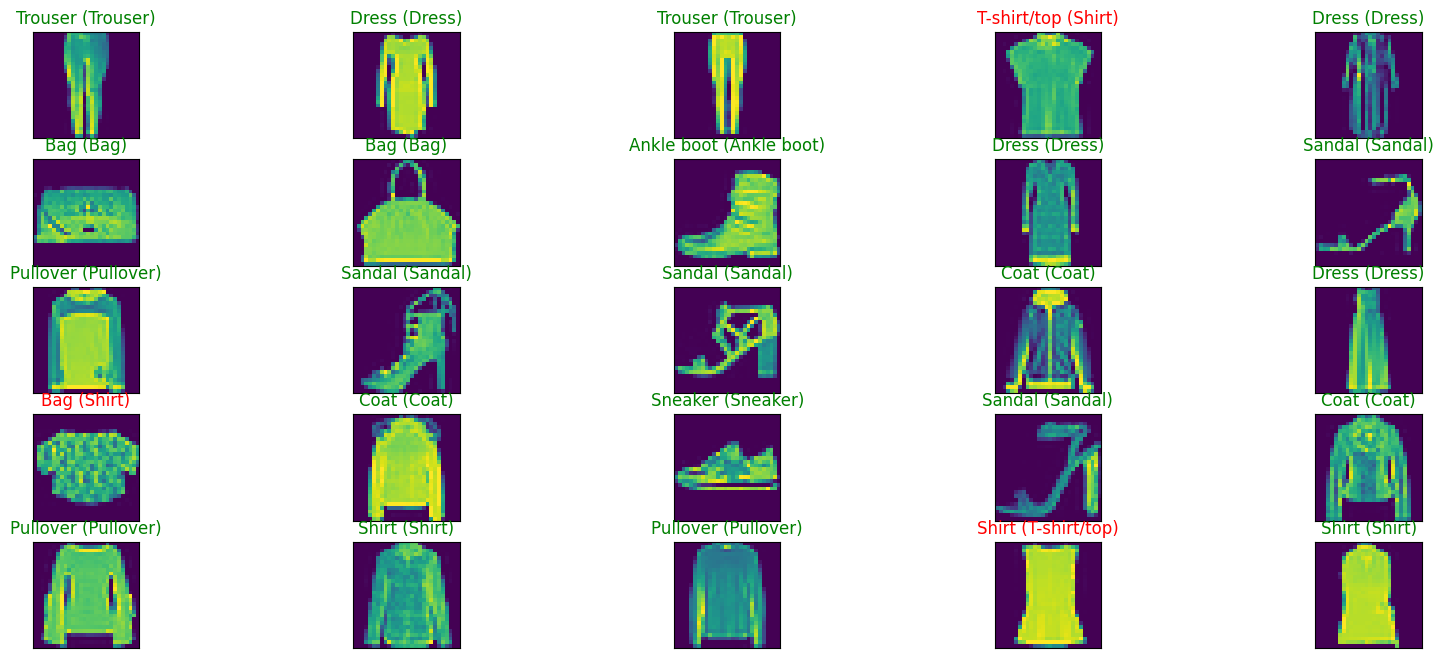

In [25]:
y_hat = model.predict(x_test)

# Plot a random sample of 25 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=25, replace=False)):
    ax = figure.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index])) #squeeze() ช่วยในการลดมิติของอาร์เรย์และมักจะมีประโยชน์ในการทำงานกับข้อมูลที่มีมิติต่ำลง
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

# Model Visualization

In [26]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 4.4 MB/s eta 0:00:00


In [27]:
import visualkeras

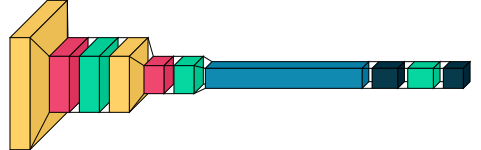

In [28]:
visualkeras.layered_view(model)

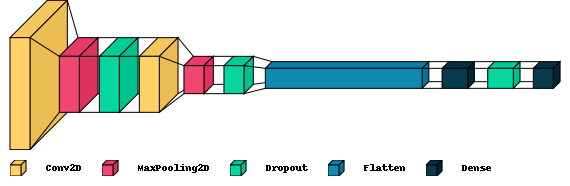

In [29]:

from collections import defaultdict
color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'orange'
color_map[MaxPooling2D]['fill'] = 'red'
color_map[Dense]['fill'] = 'pink'
color_map[Flatten]['fill'] = 'blue'
visualkeras.layered_view(model, legend=True,spacing=20, color_map=color_map)

# Output Prediction

In [30]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [31]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 6s 19ms/step


In [32]:
predictions[2]

array([0.08533674, 0.23196931, 0.08533674, 0.08533674, 0.08533674,
       0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674],
      dtype=float32)

In [33]:
output = np.argmax(predictions[2])
output

1

In [34]:
fashion_mnist_labels[output]

'Trouser'

**แสดงค่าเพื่อให้เข้าใจได้ง่ายขึ้น**

1/1 [==============================] - 0s 38ms/step
อาร์เรย์ความน่าจะเป็นที่คาดการณ์คือ:
0 : 0.085336745
1 : 0.085336745
2 : 0.085336745
3 : 0.085336745
4 : 0.085336745
5 : 0.23196927
6 : 0.085336745
7 : 0.085336745
8 : 0.085336745
9 : 0.08533677
จากทางเลือกทั้งหมดคะแนนสูงสุดคือ: 5


'Sandal'

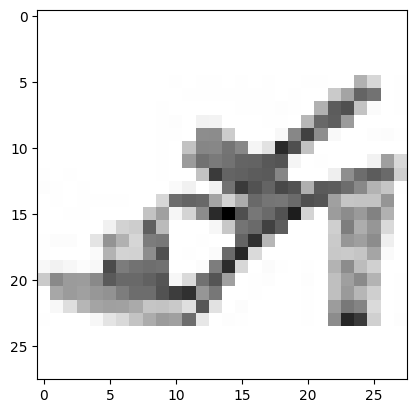

In [35]:
# Make a prediction
image_index = 1003
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = probability_model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("อาร์เรย์ความน่าจะเป็นที่คาดการณ์คือ:")

count = 0

for i in pred.squeeze(): #Squeeze คือ การยุบมิติที่มี element เดียว  ทิ้งไป
    print(count, ":", i)
    count += 1

print("จากทางเลือกทั้งหมดคะแนนสูงสุดคือ:", pred.argmax())
fashion_mnist_labels[pred.argmax()]


In [36]:
x_valid.shape


(5000, 28, 28, 1)

In [37]:
y_valid.shape

(5000, 10)

# Validation on Validation Set (5000 instances)

157/157 [==============================] - 2s 10ms/step


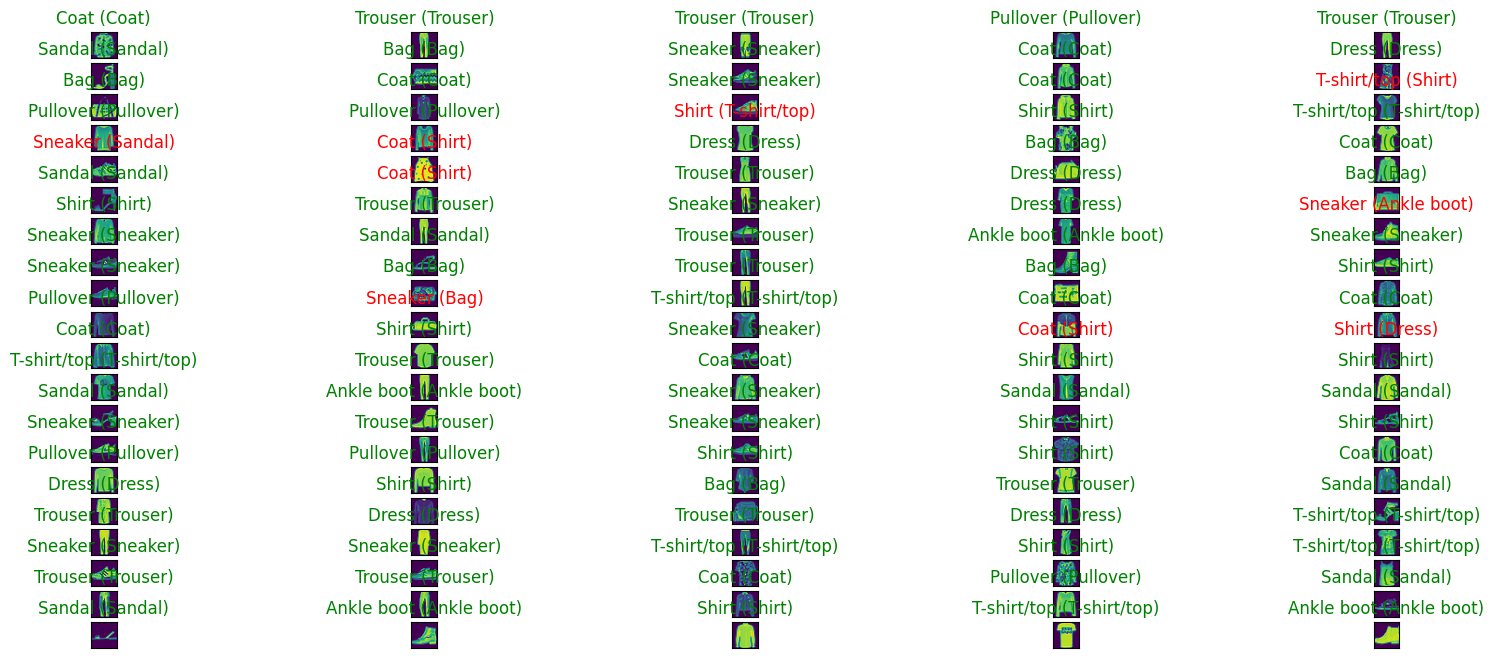

In [38]:
y_model = model.predict(x_valid)

# Plot a random sample of 25 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_valid.shape[0], size=100, replace=False)):
    ax = figure.add_subplot(20, 5, i + 1, xticks=[], yticks=[]) #10 columns and 5 rows
    # Display each image
    ax.imshow(np.squeeze(x_valid[index])) #squeeze() ช่วยในการลดมิติของอาร์เรย์และมักจะมีประโยชน์ในการทำงานกับข้อมูลที่มีมิติต่ำลง
    predict_index = np.argmax(y_model[index])
    true_index = np.argmax(y_valid[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

# Exercise
ให้เขียนโปรแกรมเพื่อแสดงข้อมูลการจำแนกภาพในชุด validation จำนวน 5000 ภาพ
ถ้าถูกแสดงสีเขียว ถ้าผิดแสดงสีแดง และสรุปผลจำนวนการจำแนกถูกและค่าประสิทธิภาพ
ตามภาพตัวอย่าง

No. 4995 Shirt (Coat)

No. 4996 Dress (Dress)

No. 4997 Ankle boot (Ankle boot)

No. 4998 Sneaker (Sneaker)

No. 4999 Trouser (Trouser)

Total  :  Number of Correctly Classify (5000 instances) :  4635

Accuracy in validation set  =  0.927

In [ ]:
#ให้ไปเขียนใน cell ถัดไปแทน

Streaming output truncated to the last 5000 lines.
No. 2 Shirt (T-shirt/top)
No. 3 Sandal (Sandal)
No. 4 Pullover (Shirt)
No. 5 Ankle boot (Ankle boot)
No. 6 Pullover (Pullover)
No. 7 Ankle boot (Ankle boot)
No. 8 Ankle boot (Ankle boot)
No. 9 Sandal (Sandal)
No. 10 Pullover (Pullover)
No. 11 Sandal (Sandal)
No. 12 Sandal (Sandal)
No. 13 Bag (Bag)
No. 14 Coat (Coat)
No. 15 Trouser (Trouser)
No. 16 T-shirt/top (T-shirt/top)
No. 17 Dress (Dress)
No. 18 Dress (Dress)
No. 19 Sneaker (Sneaker)
No. 20 Dress (Dress)
No. 21 T-shirt/top (Shirt)
No. 22 Coat (Coat)
No. 23 Coat (Coat)
No. 24 Pullover (Pullover)
No. 25 Dress (Dress)
No. 26 Shirt (Shirt)
No. 27 T-shirt/top (T-shirt/top)
No. 28 Trouser (Trouser)
No. 29 Coat (Coat)
No. 30 Dress (Dress)
No. 31 Pullover (Pullover)
No. 32 Ankle boot (Ankle boot)
No. 33 Sandal (Sandal)
No. 34 Coat (Coat)
No. 35 Sneaker (Sneaker)
No. 36 Sandal (Sandal)
No. 37 Coat (Coat)
No. 38 Coat (Coat)
No. 39 Ankle boot (Ankle boot)
No. 40 Bag (Bag)
No. 41 Trouser (Tro

In [40]:
pip install colorama

In [43]:
from colorama import Fore, Back, Style

correct_count = 0

for i, index in enumerate(range(x_valid.shape[0])):
    predict_index = np.argmax(y_model[index])
    true_index = np.argmax(y_valid[index])


    if predict_index == true_index:
        print(Fore.GREEN+"No. {} {} ({}) ".format(index, fashion_mnist_labels[predict_index], fashion_mnist_labels[true_index]))
    else:
        print(Fore.RED+"No. {} {} ({}) ".format(index, fashion_mnist_labels[predict_index], fashion_mnist_labels[true_index]))



    if predict_index == true_index:
        correct_count += 1

accuracy = correct_count / x_valid.shape[0]

print("\nTotal : Number of Correctly Classify ({} instances) : {}".format(x_valid.shape[0], correct_count))
print("Accuracy in validation set = {:.3f}".format(accuracy))

# จักรพรรดิ จ๊อดดวงจันทร์ INE 6406022620011

Streaming output truncated to the last 5000 lines.
No. 3 Dress (Dress) 
No. 4 Trouser (T-shirt/top) 
No. 5 Pullover (Pullover) 
No. 6 Sneaker (Sneaker) 
No. 7 Pullover (Pullover) 
No. 8 Sandal (Sandal) 
No. 9 Sandal (Sandal) 
No. 10 T-shirt/top (T-shirt/top) 
No. 11 Ankle boot (Ankle boot) 
No. 12 Sandal (Sandal) 
No. 13 Sandal (Sandal) 
No. 14 Sneaker (Sneaker) 
No. 15 Ankle boot (Ankle boot) 
No. 16 Trouser (Trouser) 
No. 17 T-shirt/top (T-shirt/top) 
No. 18 Shirt (Shirt) 
No. 19 Coat (Coat) 
No. 20 Dress (Dress) 
No. 21 Trouser (Trouser) 
No. 22 Coat (Coat) 
No. 23 Bag (Bag) 
No. 24 Pullover (Coat) 
No. 25 Dress (Dress) 
No. 26 T-shirt/top (T-shirt/top) 
No. 27 Pullover (Pullover) 
No. 28 Coat (Coat) 
No. 29 Coat (Coat) 
No. 30 Sandal (Sandal) 
No. 31 Dress (Dress) 
No. 32 Coat (Shirt) 
No. 33 Shirt (Shirt) 
No. 34 T-shirt/top (T-shirt/top) 
No. 35 Bag (Bag) 
No. 36 Sandal (Sandal) 
No. 37 Pullover (Pullover) 
No. 38 Trouser (Trouser) 
No. 39 Shirt (Shirt) 
No. 40 Shirt (Shirt) 
No.